# Non-Linear Classification / Logistic Regression

### Task Description

You have three datasets (train and test) of points that are not linearly separable. 

Your task is to find a good non-linear classifier to classify these points.

You have to implement the following:

1. Look into the datasets and fill in the class labels in `plot_data`

1. `grid_search`should use scikit-learn to perform a grid search with cross-validation to find the best hyperparameters for the model, while saving both the training and test scores.

1. Choose a non-linear classifier from scikit-learn and choose two parameters to tune during the grid search.

1. Experiment with different kernels (if applicable), to find a classifier that performs well on the datasets.

# Setup

In [24]:
import numpy as np
from numpy.typing import ArrayLike
import matplotlib.pyplot as plt
from sklearn.model_selection._search import BaseSearchCV
from sklearn.base import BaseEstimator, ClassifierMixin
from typing import Dict, Any

In [25]:
def load_data(name: str) -> tuple[ArrayLike, ArrayLike]:
    """Loads data from provided .npy files and returns the x and y values.
    Args:
        name (str): The file name of the .npy file to load.
    Returns:
        tuple[ArrayLike, ArrayLike]: The x and y values of the data. x has shape (n,d) and y has shape (n,).
    """
    data = np.load(name)
    X = data[:, :-1]
    y = data[:, -1]
    return X, y

# Plot data

In [26]:
from sklearn.base import ClassifierMixin

def plot_data(X: ArrayLike, y: ArrayLike, classifier: ClassifierMixin | None = None) -> None:
    """Plots the data points and optionally the decision boundary of a classifier.

    Args:
        X (ArrayLike): The input data points.
        y (ArrayLike): The labels of the data points.
        classifier (ClassifierMixin, optional): The classifier used to predict the decision boundary. If None, only the data points are plotted. Defaults to None.
    """
    X = np.asarray(X)
    y = np.asarray(y)
    
    class_1_label = 0
    class_2_label = 1

    X_class1 = X[y==class_1_label]
    X_class2 = X[y==class_2_label]

    plt.plot(X_class1[:,0], X_class1[:,1], '.r')
    plt.plot(X_class2[:,0], X_class2[:,1], '.b')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    if classifier is not None:
        gridX, gridY = np.meshgrid(np.linspace(X[:,0].min(), X[:,0].max(), 30), np.linspace(X[:,1].min(), X[:,1].max(), 30))
        Z = classifier.predict(np.c_[gridX.ravel(), gridY.ravel()])
        plt.contourf(gridX, gridY, Z.reshape(gridY.shape), alpha=.2)
        
    plt.show()

# Grid search

In [ ]:


def grid_search(X, y, classifier: ClassifierMixin, parameters: Dict[str, Any]) -> BaseSearchCV:
    """Performs a grid search over the parameters of a classifier and returns a trained BaseSearchCV object.

    Args:
        X (_type_): The training input data points.
        y (_type_): The labels of the training data points.
        classifier (ClassifierMixin): The classifier to be used for the grid search.
        parameters (dict[str, any]): The parameters to be searched over.

    Returns:
        BaseSearchCV: A trained BaseSearchCV object containing the results of the grid search.
    """

    # TODO: Return a SearchCV object that does a grid search over the parameters and records the training and validation scores
    from sklearn.model_selection import GridSearchCV
    search = GridSearchCV(classifier, parameters, cv=5, scoring='accuracy', return_train_score=True)
    search.fit(X, y)

    return search

In [28]:
def plot_grid_search_results(classifier: BaseSearchCV) -> None:
    """Plots the results of a grid search over the parameters of a classifier.

    Args:
        classifier (BaseSearchCV): The trained BaseSearchCV object containing the results of the grid search.
    """
    results = classifier.cv_results_

    score_train = results['mean_train_score'].astype('float')
    score_valid = results['mean_test_score'].astype('float')

    x_label, y_label = classifier.param_grid.keys()

    # 2D plot of the validation scores
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot()
    im = ax.contourf(
        *classifier.param_grid.values(),
        score_valid.reshape(len(classifier.param_grid[x_label]), len(classifier.param_grid[y_label])).T,
    )
    cbar = fig.colorbar(im)
    cbar.set_label('Accuracy')
    ax.set(xlabel=x_label, ylabel=y_label)
    ax.set_xscale('log')
    ax.set_yscale('log')
    plt.show()
    
    # 3D plot of the training and validation scores
    x_param = np.log10(results[f"param_{x_label}"].data.astype('float'))
    y_param = np.log10(results[f"param_{y_label}"].data.astype('float'))
    
    ax = plt.figure(figsize=(8,8)).add_subplot(projection='3d')
    ax.set(xlabel=f"log({x_label})", ylabel=f"log({y_label})", zlabel='accuracy')
    surf_train = ax.plot_trisurf(x_param, y_param, score_train, color='r', alpha=.4, label='Training Score')
    surf_valid = ax.plot_trisurf(x_param, y_param, score_valid, color='g', alpha=.4, label='Validation Score')
    ax.legend()
    
    plt.show()

dataset_O


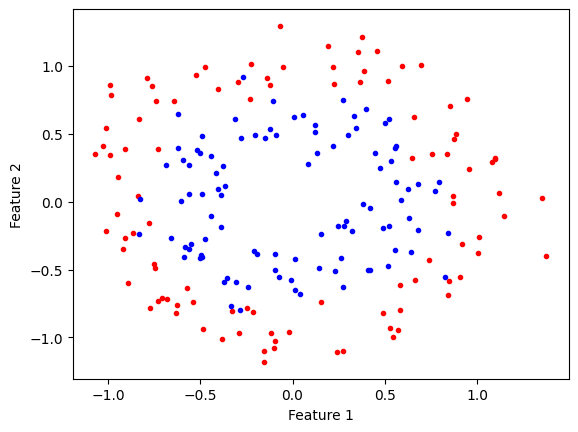

[LibSVM]*
optimization finished, #iter = 80
obj = -1.599969, rho = -0.005263
nSV = 160, nBSV = 160
Total nSV = 160
[LibSVM]*
optimization finished, #iter = 80
obj = -1.599947, rho = -0.005226
nSV = 160, nBSV = 160
Total nSV = 160
[LibSVM]*
optimization finished, #iter = 80
obj = -1.599972, rho = -0.005141
nSV = 160, nBSV = 160
Total nSV = 160
[LibSVM]*
optimization finished, #iter = 80
obj = -1.599927, rho = -0.004672
nSV = 160, nBSV = 160
Total nSV = 160
[LibSVM]*
optimization finished, #iter = 80
obj = -1.599952, rho = -0.005115
nSV = 160, nBSV = 160
Total nSV = 160
[LibSVM]*
optimization finished, #iter = 80
obj = -1.599792, rho = -0.013452
nSV = 160, nBSV = 160
Total nSV = 160
[LibSVM]*
optimization finished, #iter = 80
obj = -1.599728, rho = -0.013275
nSV = 160, nBSV = 160
Total nSV = 160
[LibSVM]*
optimization finished, #iter = 80
obj = -1.599807, rho = -0.013184
nSV = 160, nBSV = 160
Total nSV = 160
[LibSVM]*
optimization finished, #iter = 80
obj = -1.599698, rho = -0.011902
nSV

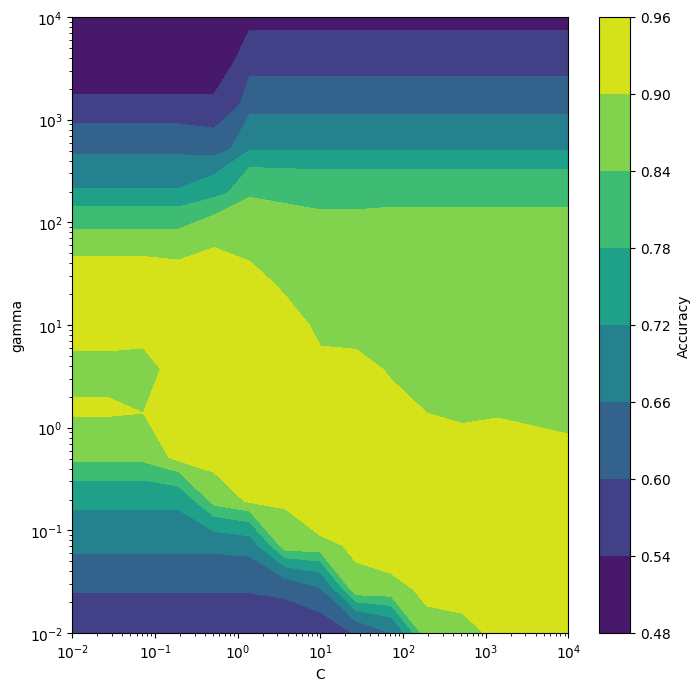

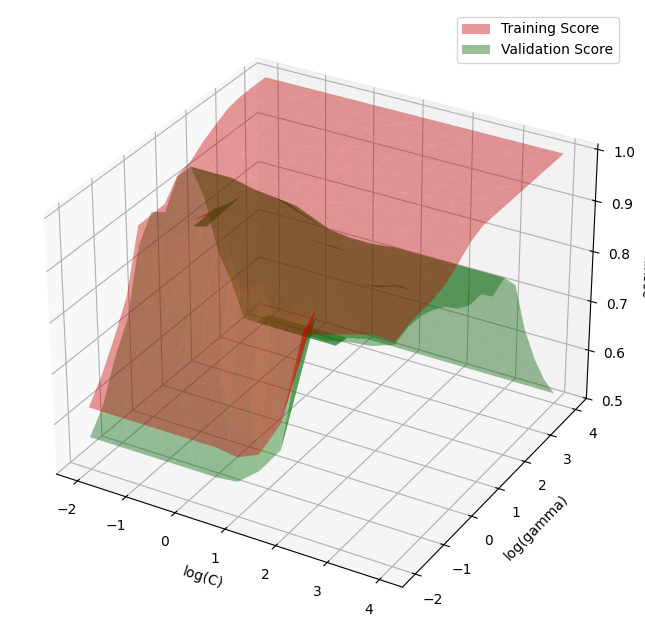

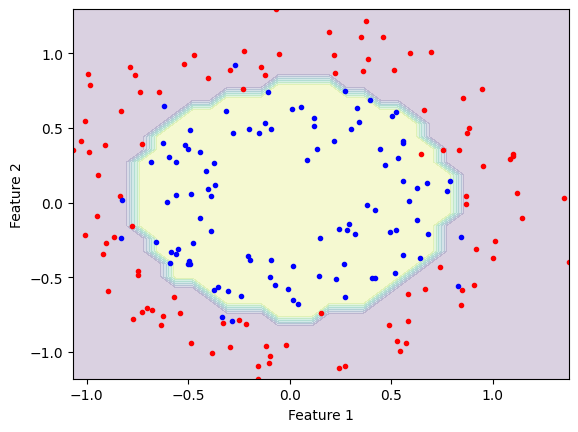

Best valid score: 0.945
Best parameters: {'C': np.float64(0.19306977288832497), 'gamma': np.float64(1.3894954943731375)}
Test score: 0.82
dataset_U


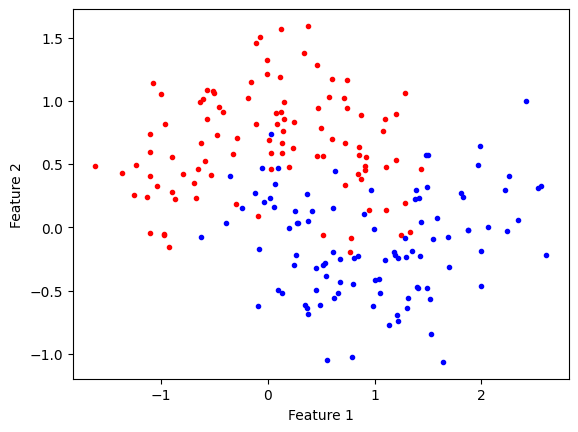

[LibSVM]*
optimization finished, #iter = 80
obj = -1.588607, rho = -0.001522
nSV = 160, nBSV = 160
Total nSV = 160
[LibSVM]*
optimization finished, #iter = 80
obj = -1.591035, rho = -0.001620
nSV = 160, nBSV = 160
Total nSV = 160
[LibSVM]*
optimization finished, #iter = 80
obj = -1.591587, rho = -0.000149
nSV = 160, nBSV = 160
Total nSV = 160
[LibSVM]*
optimization finished, #iter = 80
obj = -1.589973, rho = -0.000529
nSV = 160, nBSV = 160
Total nSV = 160
[LibSVM]*
optimization finished, #iter = 80
obj = -1.590828, rho = -0.001728
nSV = 160, nBSV = 160
Total nSV = 160
[LibSVM]*
optimization finished, #iter = 80
obj = -1.571276, rho = -0.003285
nSV = 160, nBSV = 160
Total nSV = 160
[LibSVM]*
optimization finished, #iter = 80
obj = -1.577367, rho = -0.002715
nSV = 160, nBSV = 160
Total nSV = 160
[LibSVM]*
optimization finished, #iter = 80
obj = -1.578743, rho = -0.000601
nSV = 160, nBSV = 160
Total nSV = 160
[LibSVM]*
optimization finished, #iter = 80
obj = -1.574691, rho = -0.000406
nSV

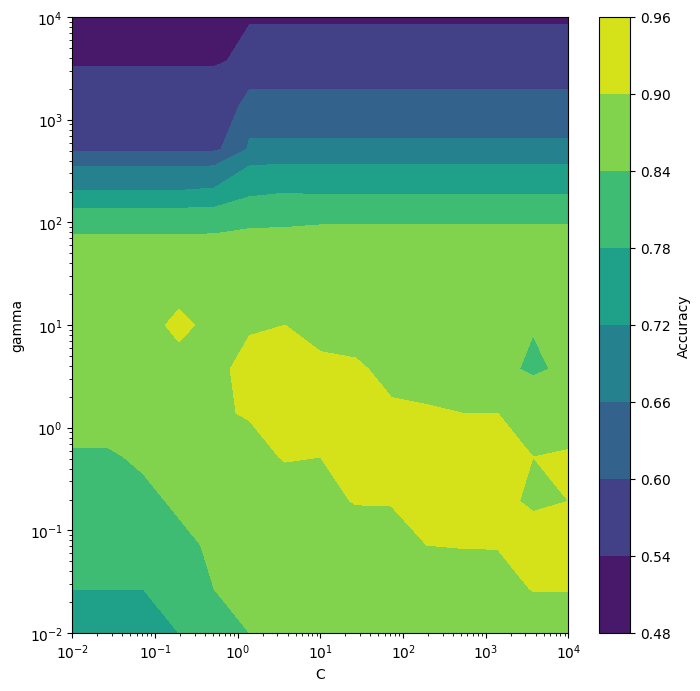

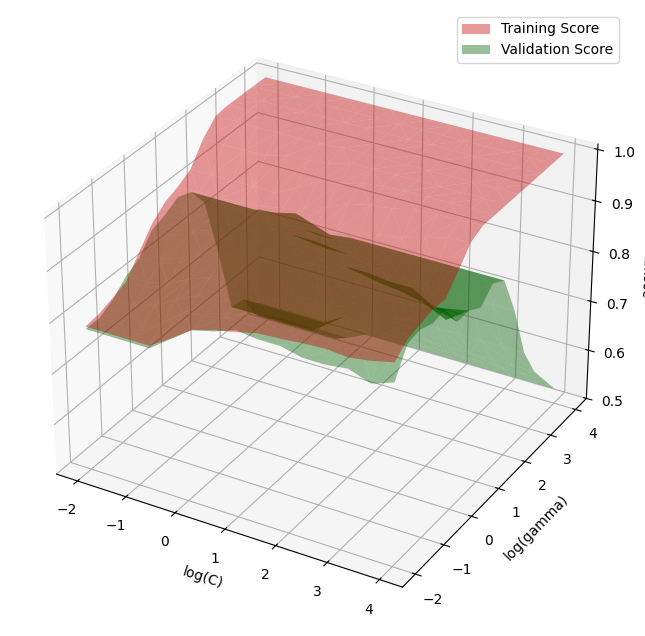

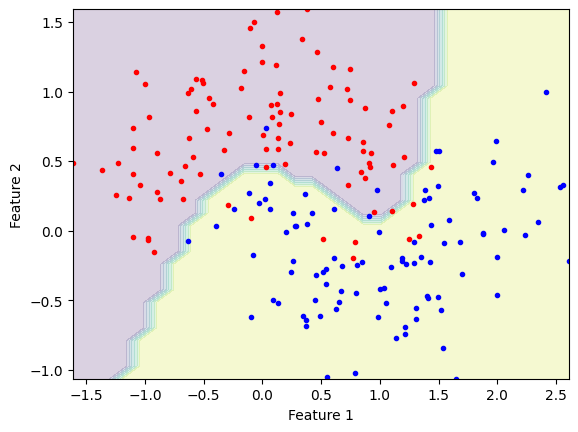

Best valid score: 0.915
Best parameters: {'C': np.float64(26.826957952797247), 'gamma': np.float64(0.517947467923121)}
Test score: 0.88
dataset_V
[LibSVM]*
optimization finished, #iter = 80
obj = -1.590497, rho = 0.007351
nSV = 160, nBSV = 160
Total nSV = 160
[LibSVM]*
optimization finished, #iter = 80
obj = -1.590706, rho = 0.006497
nSV = 160, nBSV = 160
Total nSV = 160
[LibSVM]*
optimization finished, #iter = 80
obj = -1.590604, rho = 0.006955
nSV = 160, nBSV = 160
Total nSV = 160
[LibSVM]*
optimization finished, #iter = 80
obj = -1.589442, rho = 0.004894
nSV = 160, nBSV = 160
Total nSV = 160
[LibSVM]*
optimization finished, #iter = 80
obj = -1.591330, rho = -0.003540
nSV = 160, nBSV = 160
Total nSV = 160
[LibSVM]*
optimization finished, #iter = 80
obj = -1.590907, rho = 0.002060
nSV = 160, nBSV = 160
Total nSV = 160
[LibSVM]*
optimization finished, #iter = 80
obj = -1.590857, rho = 0.005724
nSV = 160, nBSV = 160
Total nSV = 160
[LibSVM]*
optimization finished, #iter = 80
obj = -1.59

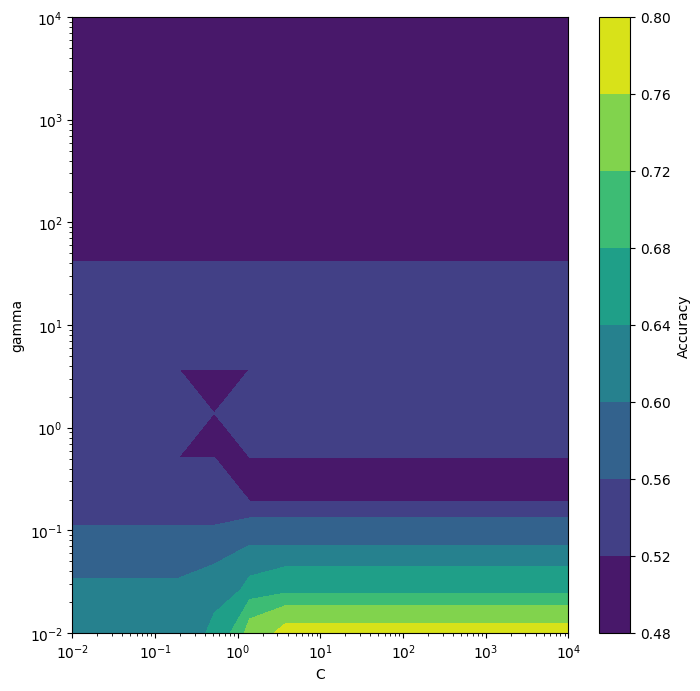

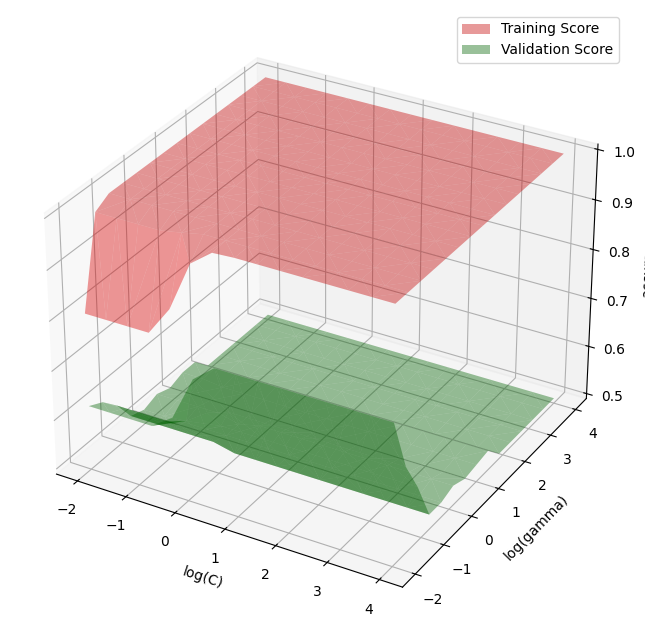

Best valid score: 0.775
Best parameters: {'C': np.float64(3.727593720314938), 'gamma': np.float64(0.01)}
Test score: 0.64


In [30]:
parameters: Dict[str, Any] = {
    'C': np.logspace(-2, 4, 15, base=10), # Regularization parameter
    'gamma': np.logspace(-2, 4, 15, base=10), # Kernel coefficient
}

for dataset_name in ['dataset_O', 'dataset_U', 'dataset_V']:
    print("="*20)
    print(dataset_name)
    print("="*20)

    X_train, y_train = load_data(f'{dataset_name}_train.npy')
    X_test, y_test = load_data(f'{dataset_name}_test.npy')

    num_samples, num_features = X_train.shape

    if num_features == 2: plot_data(X_train, y_train)

    # TODO: Choose a classifier from sklearn that can do non-linear classification. Experiment with different kernels, if applicable.
    from sklearn.svm import SVC
    classifier: ClassifierMixin = SVC(kernel='rbf', verbose=True, random_state=0) # svc with rbf
    search_result: BaseSearchCV = grid_search(X_train, y_train, classifier, parameters)
    plot_grid_search_results(search_result)

    if num_features == 2: plot_data(X_train, y_train, classifier=search_result)

    print('Best valid score:', search_result.best_score_)
    print('Best parameters:', search_result.best_params_)

    print('Test score:', search_result.score(X_test, y_test))